In [84]:
import scipy.io
import numpy as np
import mglearn
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Task 1

# Task 1.1

## Import and Display Data

In [2]:
mydata = scipy.io.loadmat('annthyroid.mat')

In [3]:
display(mydata)

{'X': array([[7.30e-01, 6.00e-04, 1.50e-02, 1.20e-01, 8.20e-02, 1.46e-01],
        [2.40e-01, 2.50e-04, 3.00e-02, 1.43e-01, 1.33e-01, 1.08e-01],
        [4.70e-01, 1.90e-03, 2.40e-02, 1.02e-01, 1.31e-01, 7.80e-02],
        ...,
        [5.10e-01, 7.60e-04, 2.01e-02, 9.00e-02, 6.70e-02, 1.34e-01],
        [3.50e-01, 2.80e-03, 2.01e-02, 9.00e-02, 8.90e-02, 1.01e-01],
        [7.30e-01, 5.60e-04, 2.01e-02, 8.10e-02, 9.00e-02, 9.00e-02]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 18 14:56:12 2016',
 '__version__': '1.0',
 'y': array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=uint8)}

In [6]:
X = mydata['X']
y = mydata['y']

## Standardize X

In [16]:
display(X)
print(X.shape)

array([[7.30e-01, 6.00e-04, 1.50e-02, 1.20e-01, 8.20e-02, 1.46e-01],
       [2.40e-01, 2.50e-04, 3.00e-02, 1.43e-01, 1.33e-01, 1.08e-01],
       [4.70e-01, 1.90e-03, 2.40e-02, 1.02e-01, 1.31e-01, 7.80e-02],
       ...,
       [5.10e-01, 7.60e-04, 2.01e-02, 9.00e-02, 6.70e-02, 1.34e-01],
       [3.50e-01, 2.80e-03, 2.01e-02, 9.00e-02, 8.90e-02, 1.01e-01],
       [7.30e-01, 5.60e-04, 2.01e-02, 8.10e-02, 9.00e-02, 9.00e-02]])

(7200, 6)


In [15]:
display(y)
print(y.shape)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=uint8)

(7200, 1)


## Mask and Separate Manually First

In [55]:
mask_0 = y==0
mask_1 = y==1

In [58]:
X_0 = X[mask_0.ravel()]
X_1 = X[mask_1.ravel()]

In [61]:
display(X_0)

array([[7.30e-01, 6.00e-04, 1.50e-02, 1.20e-01, 8.20e-02, 1.46e-01],
       [2.40e-01, 2.50e-04, 3.00e-02, 1.43e-01, 1.33e-01, 1.08e-01],
       [4.70e-01, 1.90e-03, 2.40e-02, 1.02e-01, 1.31e-01, 7.80e-02],
       ...,
       [5.10e-01, 7.60e-04, 2.01e-02, 9.00e-02, 6.70e-02, 1.34e-01],
       [3.50e-01, 2.80e-03, 2.01e-02, 9.00e-02, 8.90e-02, 1.01e-01],
       [7.30e-01, 5.60e-04, 2.01e-02, 8.10e-02, 9.00e-02, 9.00e-02]])

In [62]:
display(X_1)

array([[0.62  , 0.011 , 0.008 , 0.073 , 0.074 , 0.098 ],
       [0.5   , 0.061 , 0.0096, 0.013 , 0.116 , 0.011 ],
       [0.78  , 0.025 , 0.009 , 0.05  , 0.084 , 0.06  ],
       ...,
       [0.72  , 0.021 , 0.0096, 0.06  , 0.116 , 0.051 ],
       [0.69  , 0.0069, 0.017 , 0.109 , 0.103 , 0.106 ],
       [0.51  , 0.106 , 0.006 , 0.005 , 0.089 , 0.0055]])

## Use PCA Separate Data

In [64]:
sklearn_pca = PCA(n_components = 2)

In [66]:
X_pca = sklearn_pca.fit_transform(X)

In [67]:
display(X_pca)

array([[-2.09801102e-01,  3.08832902e-02],
       [ 2.81525596e-01,  2.12362677e-02],
       [ 5.11891078e-02, -2.77032001e-02],
       ...,
       [ 9.64772789e-03,  2.25842681e-04],
       [ 1.70160840e-01, -2.29064070e-02],
       [-2.09774138e-01, -3.44168367e-02]])

In [71]:
print("Orignial shape: {}".format(str(X.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Orignial shape: (7200, 6)
Reduced shape: (7200, 2)


In [76]:
X_pca_0 = X_pca[mask_0.ravel()]
X_pca_1 = X_pca[mask_1.ravel()]

In [77]:
display(X_pca_0)

array([[-2.09801102e-01,  3.08832902e-02],
       [ 2.81525596e-01,  2.12362677e-02],
       [ 5.11891078e-02, -2.77032001e-02],
       ...,
       [ 9.64772789e-03,  2.25842681e-04],
       [ 1.70160840e-01, -2.29064070e-02],
       [-2.09774138e-01, -3.44168367e-02]])

In [78]:
display(X_pca_1)

array([[-0.10028066, -0.0382496 ],
       [ 0.02030853, -0.14741901],
       [-0.26008642, -0.08162263],
       ...,
       [-0.19940916, -0.07917165],
       [-0.16933603, -0.00475137],
       [ 0.00989182, -0.16558662]])

Text(0,0.5,'Second principal component')

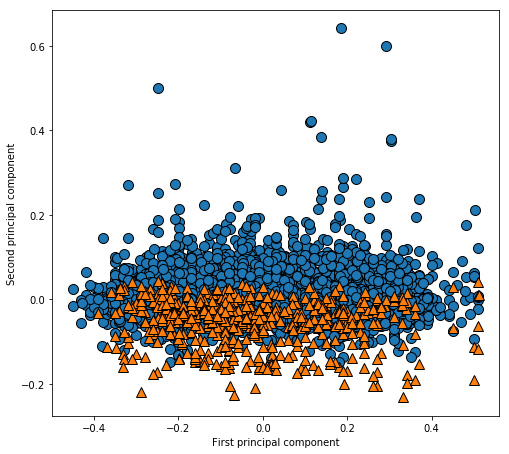

In [79]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], y.ravel())
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

# Task 1.2

## t-SNE

In [81]:
tsne_5 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 5)
tsne_10 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 10)
tsne_15 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 15)
tsne_20 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 20)
tsne_30 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 30)
tsne_40 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 40)
tsne_50 = TSNE(random_state = 42, learning_rate = 10, n_iter = 5000, perplexity = 50)

In [93]:
start = time.clock()
digits_tsne_5 = tsne_5.fit_transform(X)
end = time.clock()
print(end-start)

315.908819


In [94]:
start = time.clock()
digits_tsne_10 = tsne_10.fit_transform(X)
end = time.clock()
print(end-start)

322.26056499999993


In [95]:
start = time.clock()
digits_tsne_15 = tsne_15.fit_transform(X)
end = time.clock()
print(end-start)

336.2477419999999


In [96]:
start = time.clock()
digits_tsne_20 = tsne_20.fit_transform(X)
end = time.clock()
print(end-start)

327.80093999999985


In [97]:
start = time.clock()
digits_tsne_30 = tsne_30.fit_transform(X)
end = time.clock()
print(end-start)

365.007163


In [98]:
start = time.clock()
digits_tsne_40 = tsne_40.fit_transform(X)
end = time.clock()
print(end-start)

359.41483500000004


In [99]:
start = time.clock()
digits_tsne_50 = tsne_50.fit_transform(X)
end = time.clock()
print(end-start)

375.9266640000001


In [100]:
colors = ["#476A2A", "#7851B8"]

In [117]:
np.sum(y)/len(y)

0.07416666666666667

Text(0,0.5,'t-SNE-5 feature 1')

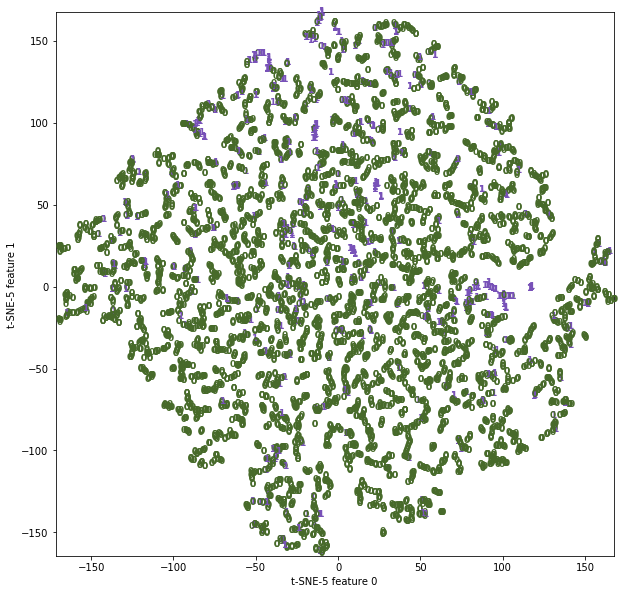

In [113]:
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne_5[:,0].min(), digits_tsne_5[:,0].max()+1)
plt.ylim(digits_tsne_5[:,1].min(), digits_tsne_5[:,1].max()+1)
for i in range(len(X)):
    plt.text(digits_tsne_5[i,0], digits_tsne_5[i,1], str(y.ravel()[i]),
            color = colors[y.ravel()[i]],
            fontdict = {'weight': 'bold', 'size':9})
plt.xlabel("t-SNE-5 feature 0")
plt.ylabel("t-SNE-5 feature 1")

Text(0,0.5,'t-SNE-10 feature 1')

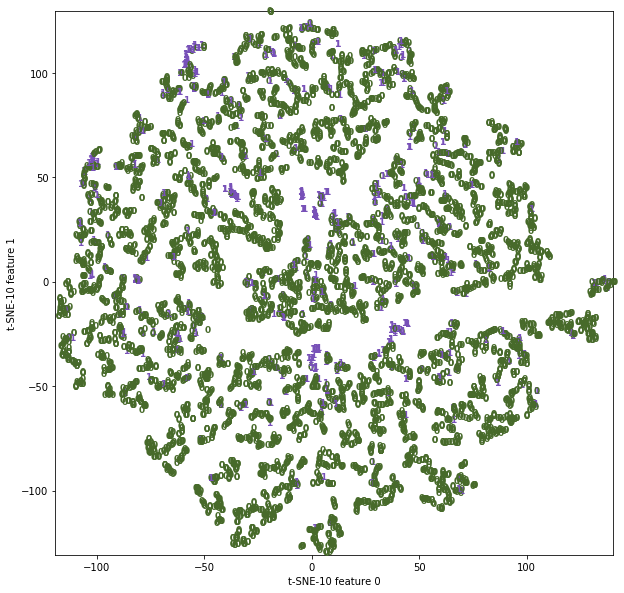

In [114]:
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne_10[:,0].min(), digits_tsne_10[:,0].max()+1)
plt.ylim(digits_tsne_10[:,1].min(), digits_tsne_10[:,1].max()+1)
for i in range(len(X)):
    plt.text(digits_tsne_10[i,0], digits_tsne_10[i,1], str(y.ravel()[i]),
            color = colors[y.ravel()[i]],
            fontdict = {'weight': 'bold', 'size':9})
plt.xlabel("t-SNE-10 feature 0")
plt.ylabel("t-SNE-10 feature 1")

Text(0,0.5,'t-SNE-15 feature 1')

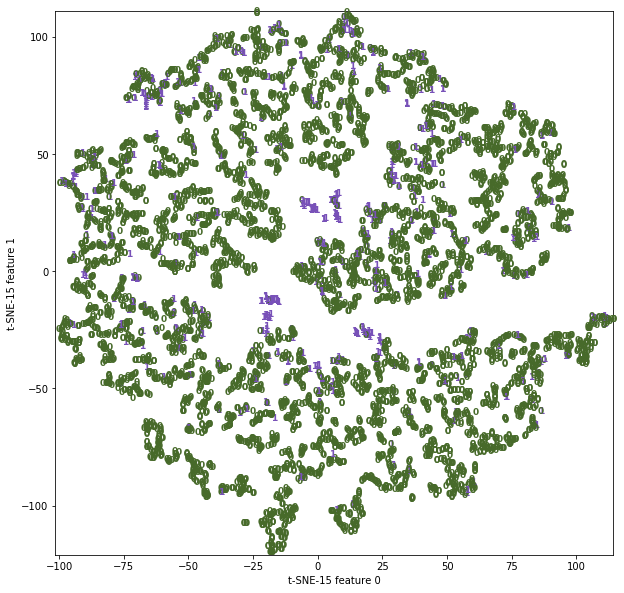

In [115]:
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne_15[:,0].min(), digits_tsne_15[:,0].max()+1)
plt.ylim(digits_tsne_15[:,1].min(), digits_tsne_15[:,1].max()+1)
for i in range(len(X)):
    plt.text(digits_tsne_15[i,0], digits_tsne_15[i,1], str(y.ravel()[i]),
            color = colors[y.ravel()[i]],
            fontdict = {'weight': 'bold', 'size':9})
plt.xlabel("t-SNE-15 feature 0")
plt.ylabel("t-SNE-15 feature 1")

Text(0,0.5,'t-SNE-20 feature 1')

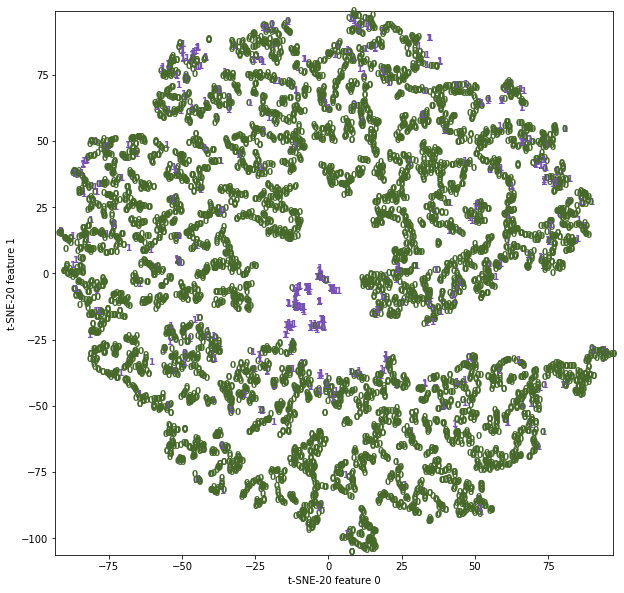

In [109]:
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne_20[:,0].min(), digits_tsne_20[:,0].max()+1)
plt.ylim(digits_tsne_20[:,1].min(), digits_tsne_20[:,1].max()+1)
for i in range(len(X)):
    plt.text(digits_tsne_20[i,0], digits_tsne_20[i,1], str(y.ravel()[i]),
            color = colors[y.ravel()[i]],
            fontdict = {'weight': 'bold', 'size':9})
plt.xlabel("t-SNE-20 feature 0")
plt.ylabel("t-SNE-20 feature 1")

Text(0,0.5,'t-SNE-30 feature 1')

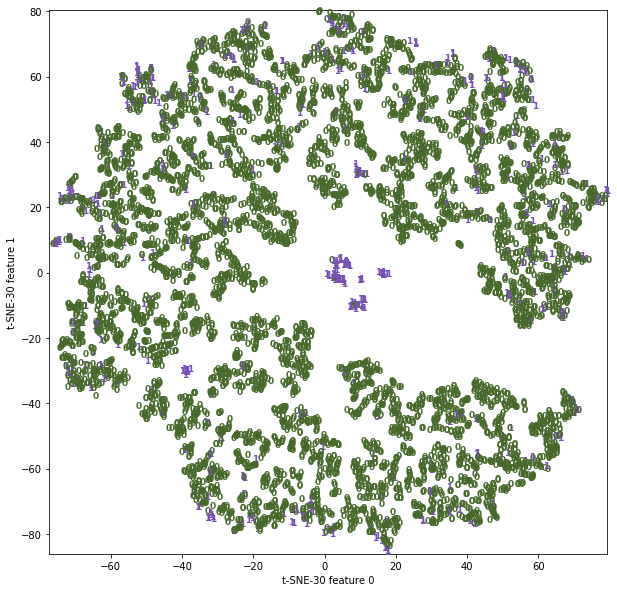

In [110]:
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne_30[:,0].min(), digits_tsne_30[:,0].max()+1)
plt.ylim(digits_tsne_30[:,1].min(), digits_tsne_30[:,1].max()+1)
for i in range(len(X)):
    plt.text(digits_tsne_30[i,0], digits_tsne_30[i,1], str(y.ravel()[i]),
            color = colors[y.ravel()[i]],
            fontdict = {'weight': 'bold', 'size':9})
plt.xlabel("t-SNE-30 feature 0")
plt.ylabel("t-SNE-30 feature 1")

Text(0,0.5,'t-SNE-40 feature 1')

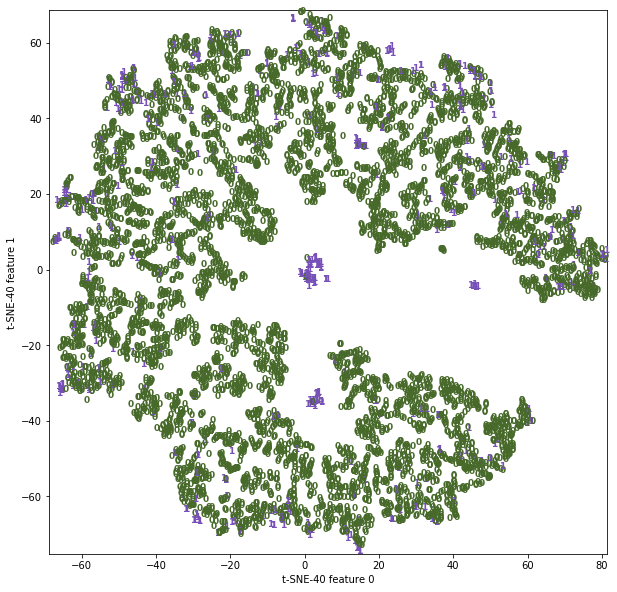

In [111]:
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne_40[:,0].min(), digits_tsne_40[:,0].max()+1)
plt.ylim(digits_tsne_40[:,1].min(), digits_tsne_40[:,1].max()+1)
for i in range(len(X)):
    plt.text(digits_tsne_40[i,0], digits_tsne_40[i,1], str(y.ravel()[i]),
            color = colors[y.ravel()[i]],
            fontdict = {'weight': 'bold', 'size':9})
plt.xlabel("t-SNE-40 feature 0")
plt.ylabel("t-SNE-40 feature 1")

Text(0,0.5,'t-SNE-50 feature 1')

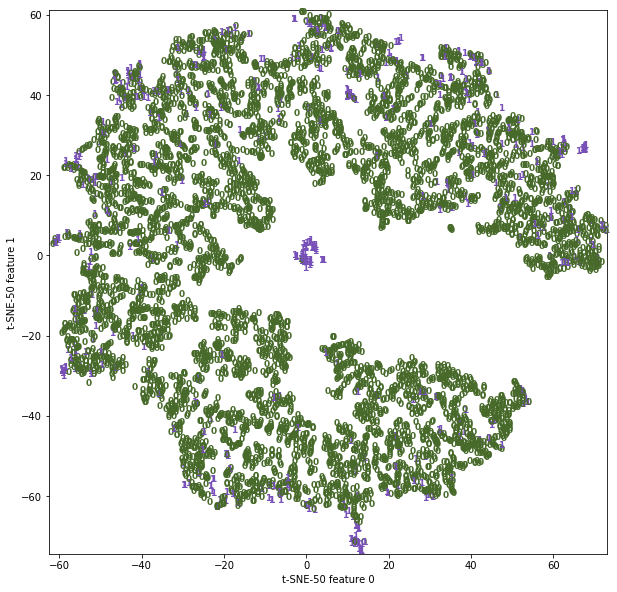

In [112]:
plt.figure(figsize = (10,10))
plt.xlim(digits_tsne_50[:,0].min(), digits_tsne_50[:,0].max()+1)
plt.ylim(digits_tsne_50[:,1].min(), digits_tsne_50[:,1].max()+1)
for i in range(len(X)):
    plt.text(digits_tsne_50[i,0], digits_tsne_50[i,1], str(y.ravel()[i]),
            color = colors[y.ravel()[i]],
            fontdict = {'weight': 'bold', 'size':9})
plt.xlabel("t-SNE-50 feature 0")
plt.ylabel("t-SNE-50 feature 1")